In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [6]:
from citipy import citipy

In [7]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

cabo san lucas mx
rikitea pf
bluff nz
altay cn
sarangani ph
ust-kuyga ru
port moresby pg
amderma ru
coihaique cl
tuktoyaktuk ca
ushuaia ar
spring hill us
mataura pf
wenatchee us
klaksvik fo
east london za
ponta do sol cv
roxana cr
srednekolymsk ru
yanan cn
albany au
hilo us
ribeira grande pt
thompson ca
sitrah bh
doctor pedro p. pena py
busselton au
grand river south east mu
mahebourg mu
watertown us
leningradskiy ru
albany au
grants pass us
busselton au
namatanai pg
grindavik is
tasiilaq gl
belushya guba ru
punta arenas cl
banda aceh id
avarua ck
harer et
ushuaia ar
hohhot cn
beringovskiy ru
mataura pf
dikson ru
khatanga ru
ahipara nz
vaini to
cape town za
kruisfontein za
barentsburg sj
bluff nz
castro cl
fortuna us
umzimvubu za
louisbourg ca
nemuro jp
barrow us
rikitea pf
ushuaia ar
joshimath in
sitka us
albany au
mataura pf
skalistyy ru
mataura pf
hobart au
qaanaaq gl
constantine dz
mar del plata ar
raudeberg no
port elizabeth za
chokwe mz
chuy uy
qaanaaq gl
bredasdorp za
bilibino r

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [9]:
# import requests and api key
import requests
from config import weather_api_key

In [10]:
# build basic url for openweathermap using my weather api key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
# import time library and the datetime module from the datetime libary
import time
from datetime import datetime

In [21]:
# create an empty list to hold the weather data.
city_data = []
# print the beginning of the loggings.
print("Beginning Data Retrieval     ")
print("-----------------------------")

#create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")




Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | cabo san lucas
Processing Record 2 of Set 13 | rikitea
Processing Record 3 of Set 13 | bluff
Processing Record 4 of Set 13 | altay
Processing Record 5 of Set 13 | sarangani
Processing Record 6 of Set 13 | ust-kuyga
Processing Record 7 of Set 13 | port moresby
Processing Record 8 of Set 13 | amderma
City not found. Skipping...
Processing Record 9 of Set 13 | coihaique
Processing Record 10 of Set 13 | tuktoyaktuk
Processing Record 11 of Set 13 | ushuaia
Processing Record 12 of Set 13 | spring hill
Processing Record 13 of Set 13 | mataura
Processing Record 14 of Set 13 | wenatchee
Processing Record 15 of Set 13 | klaksvik
Processing Record 16 of Set 13 | east london
Processing Record 17 of Set 13 | ponta do sol
Processing Record 18 of Set 13 | roxana
Processing Record 19 of Set 13 | srednekolymsk
Processing Record 20 of Set 13 | yanan
City not found. Skipping...
Processing Record 21 of Set 13 | alb

KeyboardInterrupt: 

In [23]:
len(city_data)

184

In [24]:
# convert the array of dictionaries to a pandas dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cabo San Lucas,22.8909,-109.9124,68.50,74,49,13.00,MX,2022-04-10 14:16:55
1,Rikitea,-23.1203,-134.9692,78.62,73,1,15.68,PF,2022-04-10 14:16:56
2,Bluff,-46.6000,168.3333,49.21,88,31,8.12,NZ,2022-04-10 14:16:56
3,Altay,47.8667,88.1167,37.13,46,74,7.36,CN,2022-04-10 14:16:56
4,Sarangani,5.4033,125.4636,82.11,78,86,20.40,PH,2022-04-10 14:16:57


In [25]:
# fix columns
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cabo San Lucas,MX,2022-04-10 14:16:55,22.8909,-109.9124,68.50,74,49,13.00
1,Rikitea,PF,2022-04-10 14:16:56,-23.1203,-134.9692,78.62,73,1,15.68
2,Bluff,NZ,2022-04-10 14:16:56,-46.6000,168.3333,49.21,88,31,8.12
3,Altay,CN,2022-04-10 14:16:56,47.8667,88.1167,37.13,46,74,7.36
4,Sarangani,PH,2022-04-10 14:16:57,5.4033,125.4636,82.11,78,86,20.40


In [26]:
# create the output file csv
output_data_file = "weather_data/cities.csv"
# export the city_data into a csv
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [31]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

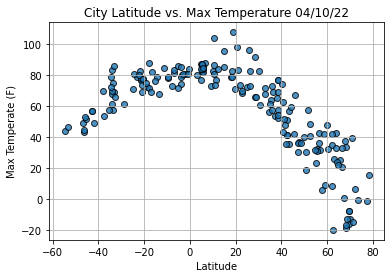

In [32]:
# import time module
import time

# build the scatter plot for latidue vs max temp
plt.scatter(lats, max_temps, edgecolors="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperate (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save this figure
plt.savefig("weather_data/Fig1.png")

# Show the plot
plt.show()

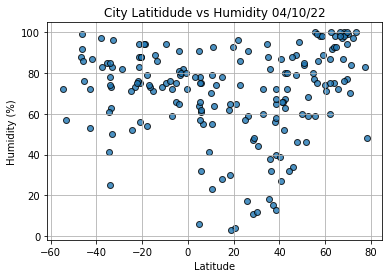

In [37]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats, humidity, edgecolors= "black", linewidths=1, marker="o", alpha=0.8, label="Cities")
# incorporate the other graph properties

plt.title(f"City Latitidude vs Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


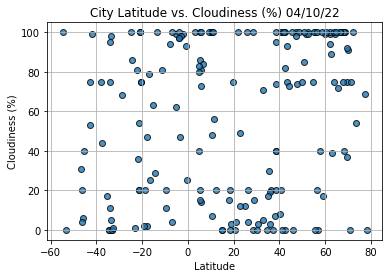

In [34]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

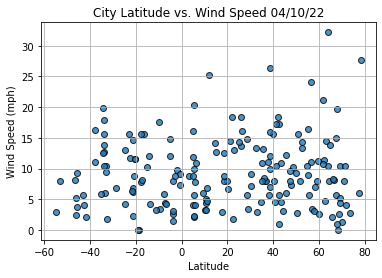

In [35]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()